DD2410 — Planning Assignment  
Chris Sprague  
sprague@kth.se

# Description

In this assignment you're tasked to implement a robotic planning method to drive a Dubins car with the dynamics
$$
\left[
\begin{matrix}
\frac{dx}{dt} \\
\frac{dy}{dt} \\
\frac{d\theta}{dt} \\
\end{matrix}\right]=\left[
\begin{matrix}
\cos \theta \\
\sin \theta \\
\tan \phi(t)
\end{matrix}
\right]
$$
from an initial position $(x_0, y_0)$ to a target position $(x_f, y_f)$, while avoiding collisions with obstacles and going out of bounds.

## Variables
The state variables are
$$
\begin{matrix}
x & = & \text{horizontal position} \\
y & = & \text{vertical position} \\
\theta & = & \text{heading angle}
\end{matrix}
$$
and the control is
$$
\phi(t) \in [-\pi/4, \pi/4] = \text{steering angle}.
$$

# Tasks

We'll consider two graded tasks in order of difficulty:

 - **E** — reach the target with circular obstacles;
 - **C** — reach the target with line obstacles.
 
**Note**:

- the line obstacles are represented by a series of circular obstacles,
- the initial and target positions are randomised,
- and the obstacle in Kattis are different.

# Your solution file

Using the API (see `README.pdf`) and a robotic planning method, generate a sequence of steering angle commands `controls` and a sequence of times `times`, between which the commands are executed, that would yield a collision-free and task-fulfilling trajectory.

Do this by editing the function `solution(car)` contained in the file `solution.py`. If needed, supporting code can be added outside the `solution(car)` function.

The template solution looks like this:  
```python
def solution(car):

    ''' <<< write your code below >>> '''
    controls=[0]
    times=[0,1]

    ''' <<< write your code above >>> '''

    return controls, times
```

## The solution function
The solution function `solution(car)` recieves a `Car` instance `car` and returns a tuple containing

 - `controls : list`: sequence of steering angles `controls[i] : float`,
 - `times : list`: sequence of times at which the controls are executed `times[i] : float`.

**Note**: `controls[i]` is considered to be constant between `times[i]` and `times[i+1]`, hence `len(controls) == len(times) - 1`.

## The `Car` object
The `Car` object has several attributes which you may find useful, namely:

 - `x0 : float`: initial x-position
 - `y0 : float`: initial y-position
 - `xt : float`: target x-position
 - `yt : float`: target y-position
 - `xlb : float`: minimum x-position
 - `xub : float`: maximum x-position
 - `ylb : float`: minimum y-position
 - `yub : float`: maximum y-position
 - `obs : list`: list of tuples for each obstacle `obs[i]`, where:
   - `obs[i][0] : float`: x-position
   - `obs[i][1] : float`: y-position
   - `obs[i][2] : float`: radius

**Note**: these attributes should not be edited.

In [1]:
from dubins import Car
car = Car()
print(car.__dict__)

{'_environment': <dubins.Environment object at 0x7f179c4d2c50>, 'x0': 0.0, 'y0': 3.2391864432626347, 'xt': 20.0, 'yt': 6.192294996554469, 'obs': [(6.265392562094496, 6.041777229372004, 0.7163509740556866), (11.253338957069111, 6.945329079062532, 0.6590515138402037), (11.63540620099571, 4.143855055417216, 0.663082654436773), (14.366463960130238, 3.928638306976023, 0.5309048730271383), (13.360593052417883, 1.3855318481167713, 0.5209728464956396), (8.295845400408858, 3.328439611620683, 0.523820445703946), (15.419053589392373, 5.7377957493328235, 0.5507787560235685), (5.239727140428663, 2.236212798992681, 0.654161998523906), (9.159455308270687, 8.224584585768465, 0.524589635288561), (14.449178108415577, 9.161499842737221, 0.5635807320099291), (11.271015694214686, 1.004954985164139, 0.5446209607951273), (6.777727241502461, 8.752224800174412, 0.6284582987911573), (12.089677123810471, 9.143555411828443, 0.6515684558370866), (4.618899698161086, 7.908212030338597, 0.587827483548474), (7.7152571

## The `step` function
The method that you'll need to utilise in your implementation of robotic planning methods is `step(car, x, y, theta, phi)` (imported from `dubins`), which takes as its arguments:

 - `car : Car`: instance of `Car`
 - `x : float`: x-position
 - `y : float`: y-position
 - `theta : float`: heading angle
 - `phi : float`: steering angle
 - `dt=0.01: float`: time-step size
 
and returns a tuple of the form `(xn, yn, thetan)` after `dt` seconds, containing:

 - `xn : float`: new x-position
 - `yn : float`: new y-position
 - `thetan : float`: new heading angle

**Note**: `dt` should not be below 0.01s.

After computing the new state `xn, yn, thetan = step(car, x, y, theta, phi)`, check `car.obs` to see if the new position is within any obstacles, `(car.xlb, car.xub, car.ylb, car.yub)` to see if it is out of bounds, and `(car.xt, car.yt)` to see if it is close the the target position.

## Taking a single step

In [2]:
from dubins import step

# heading and arbitrary steering angle
theta, phi = 0.0, 0.1

# take a step
step(car, car.x0, car.y0, theta, phi, dt=0.1)

(0.1, 3.2391864432626347, 0.010033467208545055)

## Recording multiple steps

In [3]:
# trajectory: x, y, theta, phi, time
xl, yl, thetal, phil, tl = [car.x0], [car.y0], [0.0], [], [0.0]

# simulate for 1 seconds with constant steering angle
phi = 0.1
for _ in range(10):
    xn, yn, thetan = step(car, xl[-1], yl[-1], thetal[-1], phi, dt=0.1)
    xl.append(xn)
    yl.append(yn)
    thetal.append(thetan)
    phil.append(phi)
    tl.append(tl[-1] + 0.1)

print('The state after 10s is (x={:.3f}, y={:.3f}, theta={:.3f})'.format(
    xl[-1], yl[-1], thetal[-1]
))
print('The controls and times were:\n phi={} \n t={}'.format(phil, tl))

The state after 10s is (x=0.999, y=3.284, theta=0.100)
The controls and times were:
 phi=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] 
 t=[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]


## Creating a solution

In [4]:
def solution(car):

    # trajectory: x, y, theta, phi, time
    x, y = car.x0, car.y0
    xl, yl, thetal, phil, tl = [x], [y], [0.0], [], [0.0]

    # simulate for 10 seconds with constant steering angle
    phi = 0.1
    for _ in range(1000):
        xn, yn, thetan = step(car, xl[-1], yl[-1], thetal[-1], phi, dt=0.1)
        xl.append(xn)
        yl.append(yn)
        thetal.append(thetan)
        phil.append(phi)
        tl.append(tl[-1] + 0.1)

    # return controls and times
    return phil, tl

## Evaluating your solution

Grade E: 0/6 cases passed.
Grade C: 0/6 cases passed.


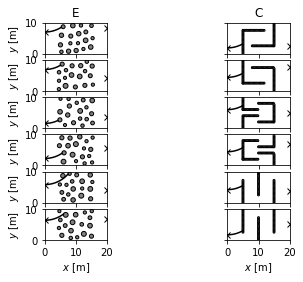

In [5]:
%matplotlib inline
from main import main
main(solution, plot=True, verbose=False)

Once you're done editing `solution.py`, you can evaluate how well your solution did in the terminal by executing

- `python3 main.py`,
- `python3 main.py -p` for plotting,
- `python3 main.py -v` for step feedback,
- or `python3 main.py -p -v` for both.

**Note**:

- you must install `matplotlib` for plotting to work,
- simulation is done at `dt=0.01` between `times[i]` and `times[i+1]`.

A succesful solution will generate something like this:

```bash
python3 main.py -p
```
```bash
Grade E: 6/6 cases passed.
Grade C: 6/6 cases passed.
```

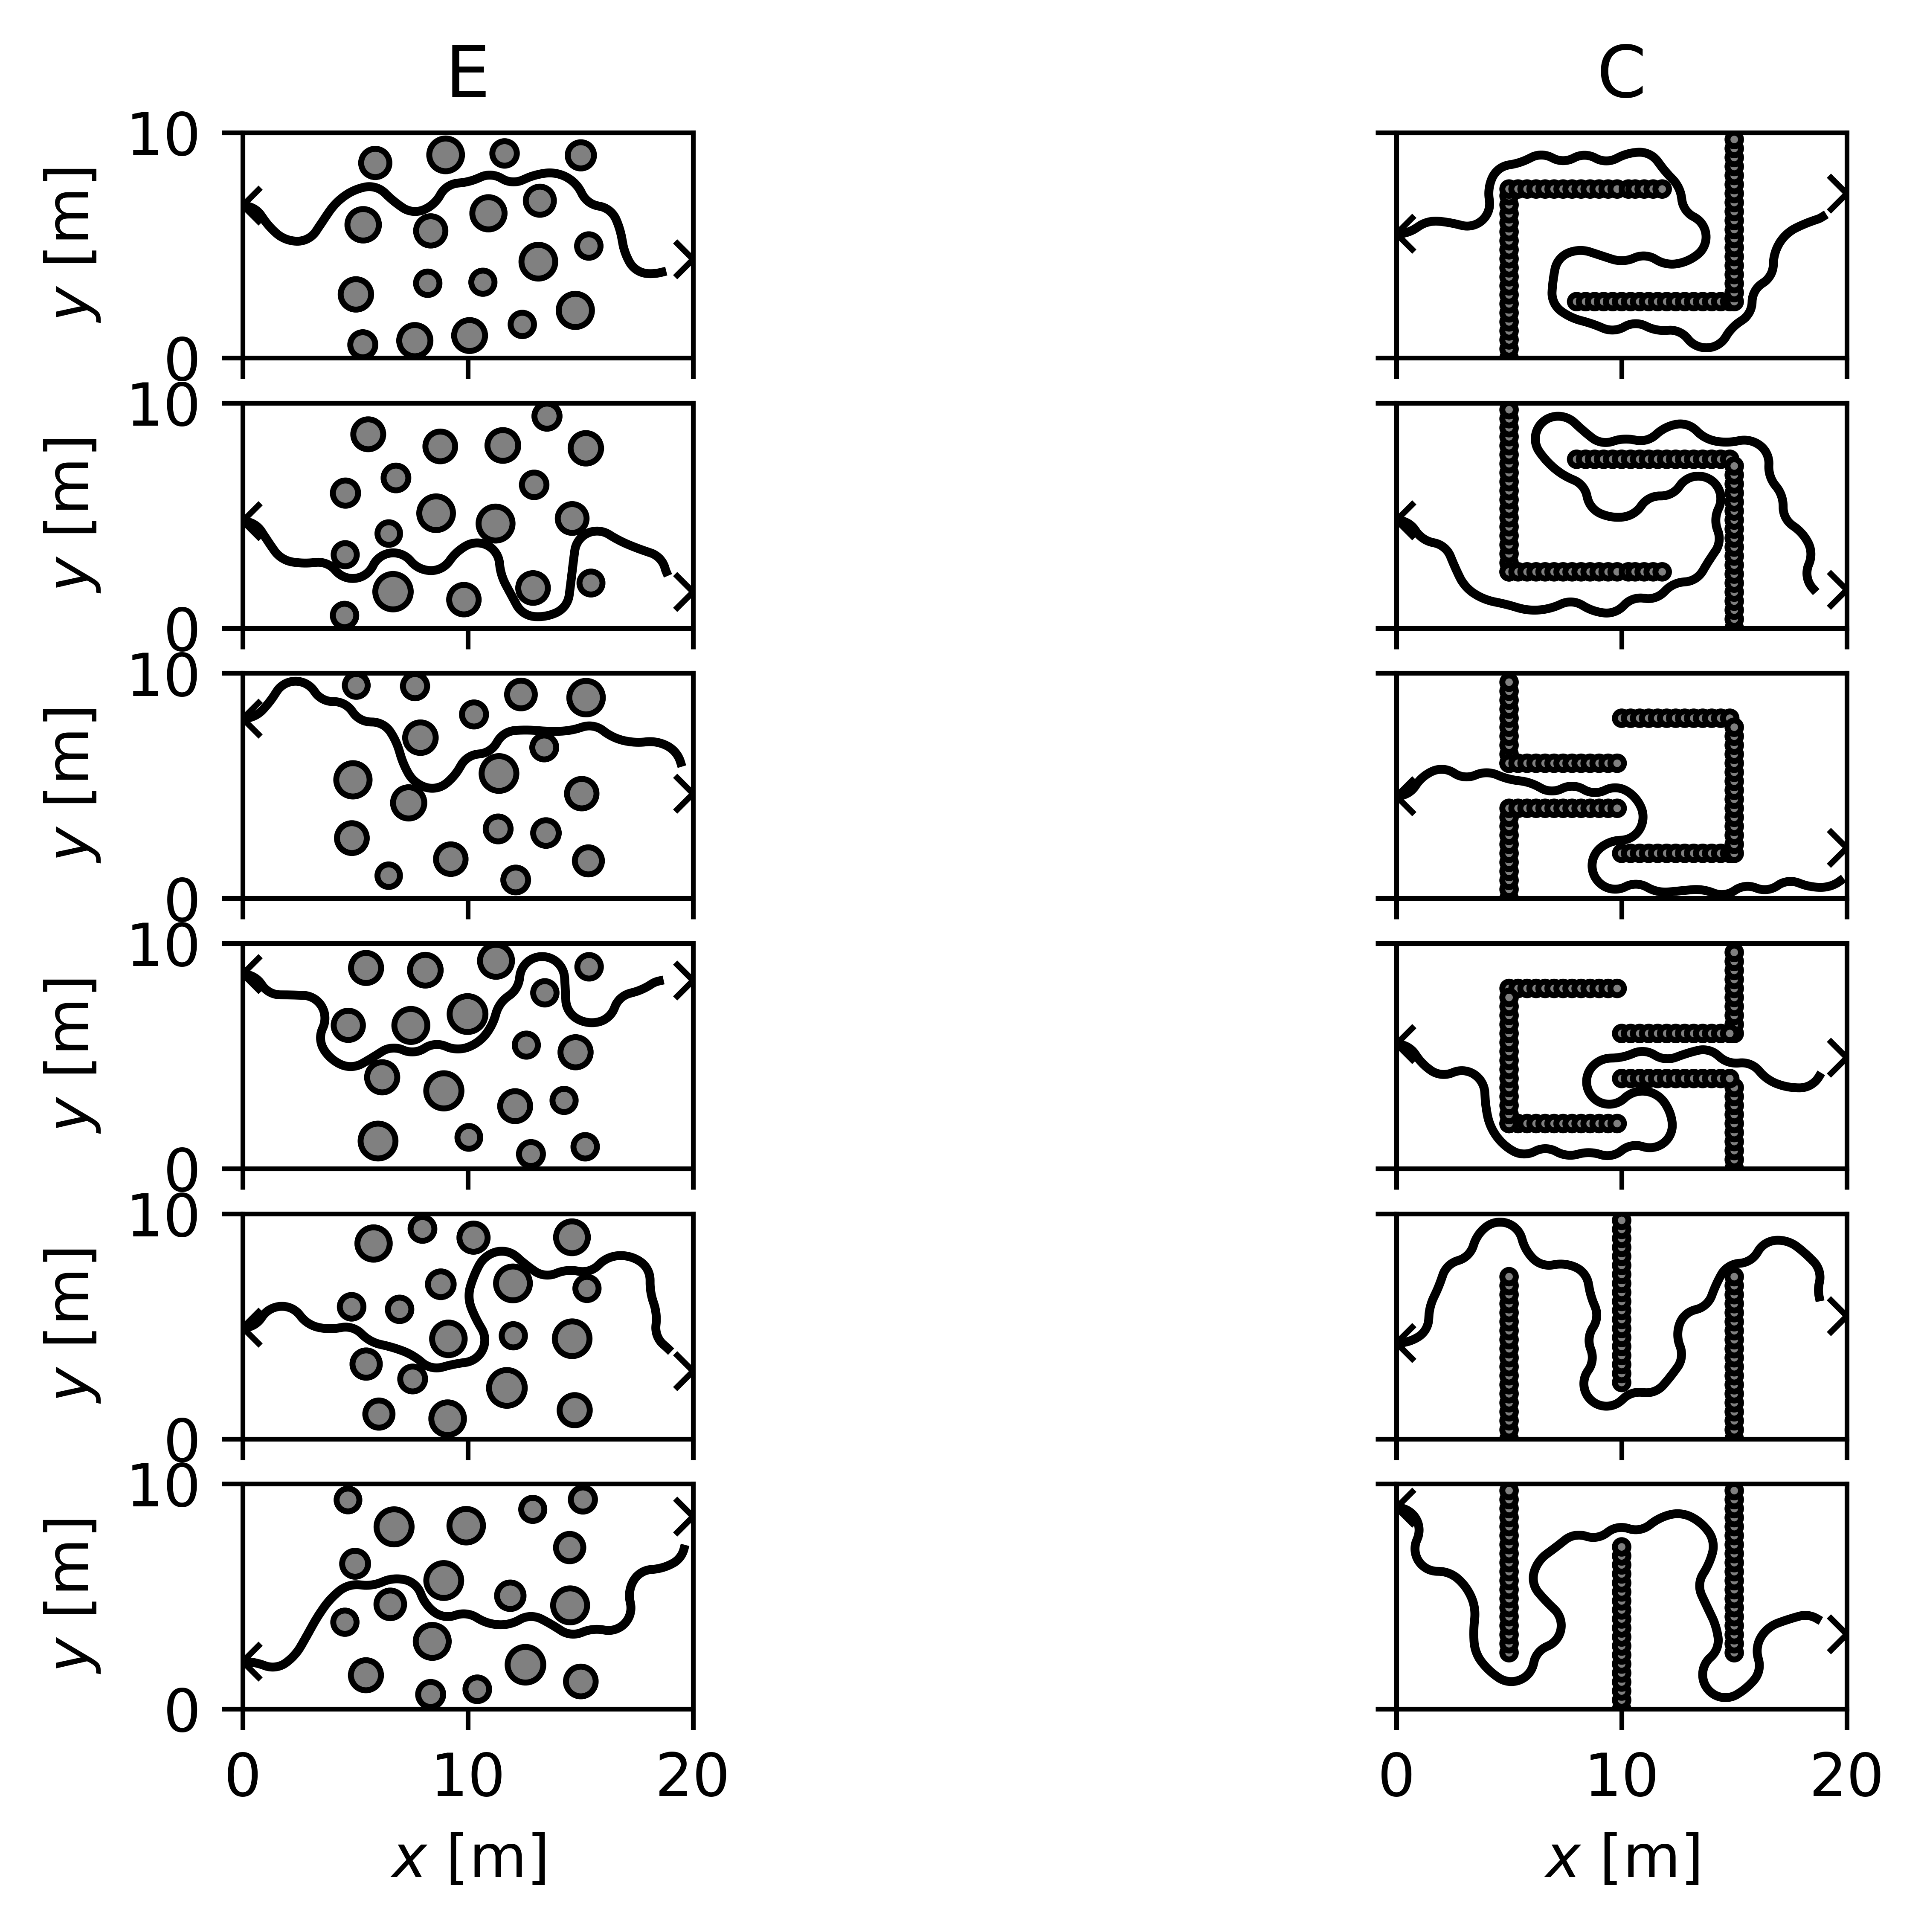

In [6]:
from IPython.display import Image
Image(filename='plot.png',  width=350) 

# Useful resources

- [PythonRobotics](https://github.com/AtsushiSakai/PythonRobotics#path-planning) for planning algorithms.